# Project Vaayu

Welcome to Project Vaayu. 

This notebook covers training the UNet++ models that we will use for performing image segmentation on the tiles that we generate from orthophotos. To learn more about the problem statement and what we are trying to solve, check out this [repository](https://github.com/Kabeer2004/ProjectVaayu/).

## UNet++ 

UNet++ (U-Net with Nested Skip Pathways) is an advanced architecture for image segmentation tasks, primarily used in medical imaging and computer vision. It builds upon the original U-Net model by enhancing its skip connections through nested pathways. This structure allows the network to capture more fine-grained features at various resolutions, improving segmentation accuracy. The key innovation of UNet++ is the introduction of dense skip pathways and deep supervision, which helps refine the features learned at different levels and improves the overall performance of the model. This makes UNet++ particularly effective for complex segmentation tasks where precise details are critical.

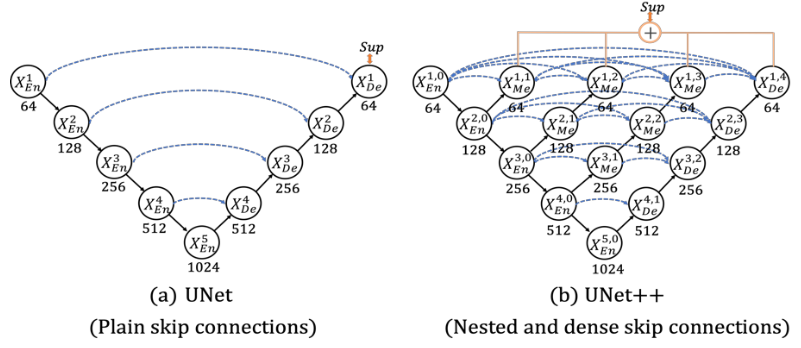

## Downloading the Dataset

We will use GDown to download a dataset of input tiles and expected output masks that I have created from the SVAMITVA data provided to us by the Ministry of Panchayati Raj. You can read more about the training data creation process [here](https://github.com/Kabeer2004/ProjectVaayu/#dealing-with-the-data).

In [1]:
!pip install gdown 
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 72 not upgraded.
Need to get 145 kB of archives.
After this operation, 339 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 unrar amd64 1:6.1.5-1 [145 kB]
Fetched 145 kB in 1s (274 kB/s)
Selecting previously unselected package unrar.
(Reading database ... 122997 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a6.1.5-1_amd64.deb ...
Unpacking unrar (1:6.1.5-1) ...
Setting up unrar (1:6.1.5-1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode
update-alternatives: warning: skip creation of /usr/share/man/man1/unrar.1.gz because associated file /usr/share/man/man1/unrar-nonfree.1.gz (of link group unrar) doesn't exist
Processing triggers for man-db (2.10.2-1) ...

In [2]:
!gdown 1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a

Downloading...
From (original): https://drive.google.com/uc?id=1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a
From (redirected): https://drive.google.com/uc?id=1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a&confirm=t&uuid=a95004af-fd86-4fc5-8519-8484c4c2bc6e
To: /kaggle/working/test_dataset.rar
100%|███████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 111MB/s]


In [3]:
!unrar x test_dataset.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from test_dataset.rar

Creating    final_dataset                                             OK
Creating    final_dataset/built_up                                    OK
Creating    final_dataset/built_up/input                              OK
Extracting  final_dataset/built_up/input/output_tile_0_3.tif             0  OK 
Extracting  final_dataset/built_up/input/output_tile_1_1.tif             1  OK 
Extracting  final_dataset/built_up/input/output_tile_1_2.tif               2  OK 
Extracting  final_dataset/built_up/input/output_tile_1_3.tif               3  OK 
Extracting  final_dataset/built_up/input/output_tile_2_0.tif             3  OK 
Extracting  final_dataset/built_up/input/output_tile_2_1.tif               4  OK 
Extracting  final_dataset/built_up/input/output_tile_2_2.tif               5  OK 
Extracting  final_dataset/built_up/input/output_tile_2_3.tif               6  OK 
Extracting  final_dat

## Visualizing the Data

Lets take a look at the data we are dealing with. Here I am visualizing the input and output data for buildings, roads and water bodies.

In [4]:
!pip install rasterio matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.3 MB/s eta 0:00:00:00:0100:01


In [5]:
import rasterio
import matplotlib.pyplot as plt

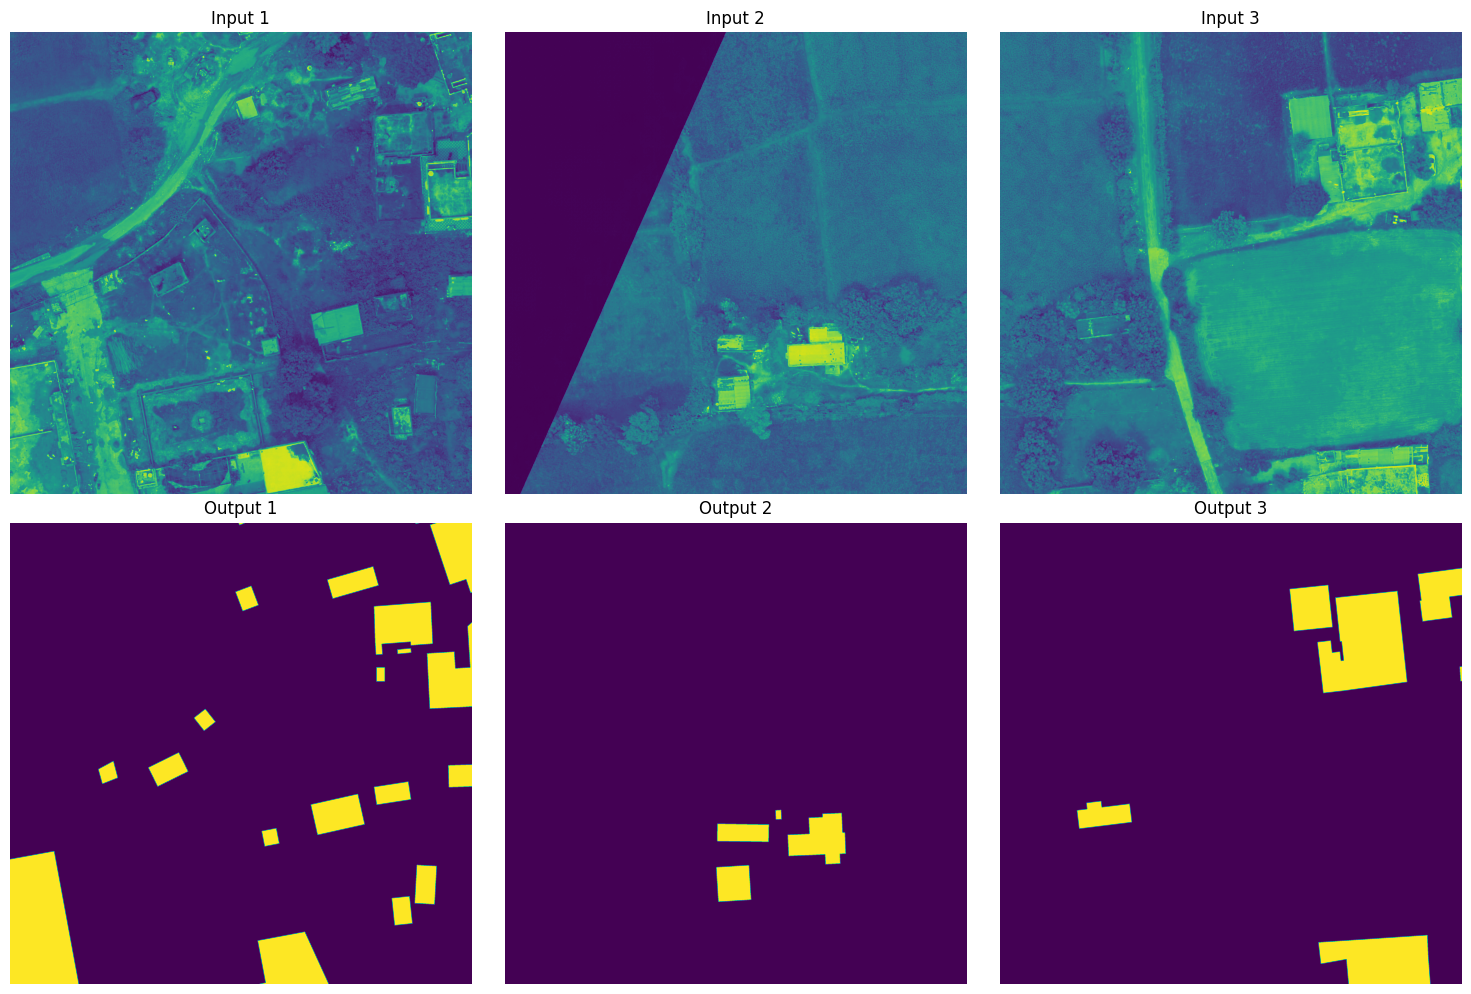

In [6]:
input_files = [
    "final_dataset/built_up/input/output_tile_3_2.tif",
    "final_dataset/built_up/input/output_tile_1_1.tif",
    "final_dataset/built_up/input/output_tile_1_2.tif"
]

output_files = [
    "final_dataset/built_up/outputs/output_tile_3_2.tif",
    "final_dataset/built_up/outputs/output_tile_1_1.tif",
    "final_dataset/built_up/outputs/output_tile_1_2.tif"
]

# Function to read and return the data from a TIFF file
def read_tiff(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1)  # Read the first band

# Create a figure with 2 rows and 3 columns (3 inputs and 3 outputs)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the input files (row 1)
for i, file in enumerate(input_files):
    data = read_tiff(file)
    ax = axes[0, i]  # Access the correct subplot
    ax.imshow(data, cmap='viridis')
    ax.set_title(f"Input {i+1}")
    ax.axis('off')

# Plot the output files (row 2)
for i, file in enumerate(output_files):
    data = read_tiff(file)
    ax = axes[1, i]  # Access the correct subplot
    ax.imshow(data, cmap='viridis')
    ax.set_title(f"Output {i+1}")
    ax.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

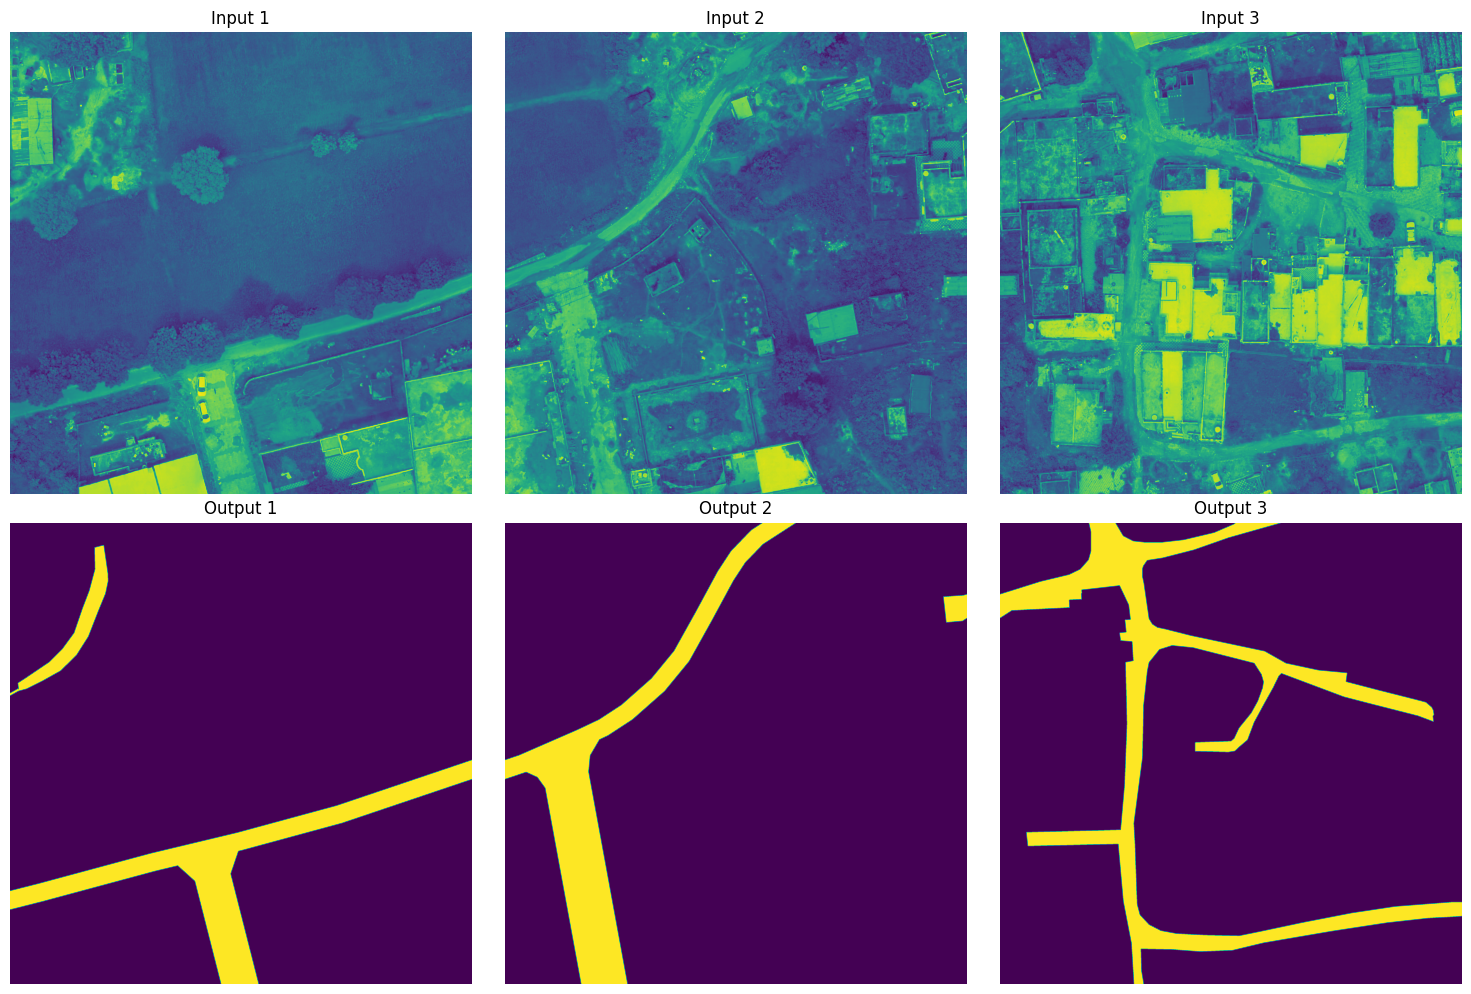

In [9]:
input_files = [
    "final_dataset/roads/input/output_tile_3_1.tif",
    "final_dataset/roads/input/output_tile_3_2.tif",
    "final_dataset/roads/input/output_tile_3_3.tif"
]

output_files = [
    "final_dataset/roads/output/output_tile_3_1.tif",
    "final_dataset/roads/output/output_tile_3_2.tif",
    "final_dataset/roads/output/output_tile_3_3.tif"
]

# Function to read and return the data from a TIFF file
def read_tiff(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1)  # Read the first band

# Create a figure with 2 rows and 3 columns (3 inputs and 3 outputs)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the input files (row 1)
for i, file in enumerate(input_files):
    data = read_tiff(file)
    ax = axes[0, i]  # Access the correct subplot
    ax.imshow(data, cmap='viridis')
    ax.set_title(f"Input {i+1}")
    ax.axis('off')

# Plot the output files (row 2)
for i, file in enumerate(output_files):
    data = read_tiff(file)
    ax = axes[1, i]  # Access the correct subplot
    ax.imshow(data, cmap='viridis')
    ax.set_title(f"Output {i+1}")
    ax.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

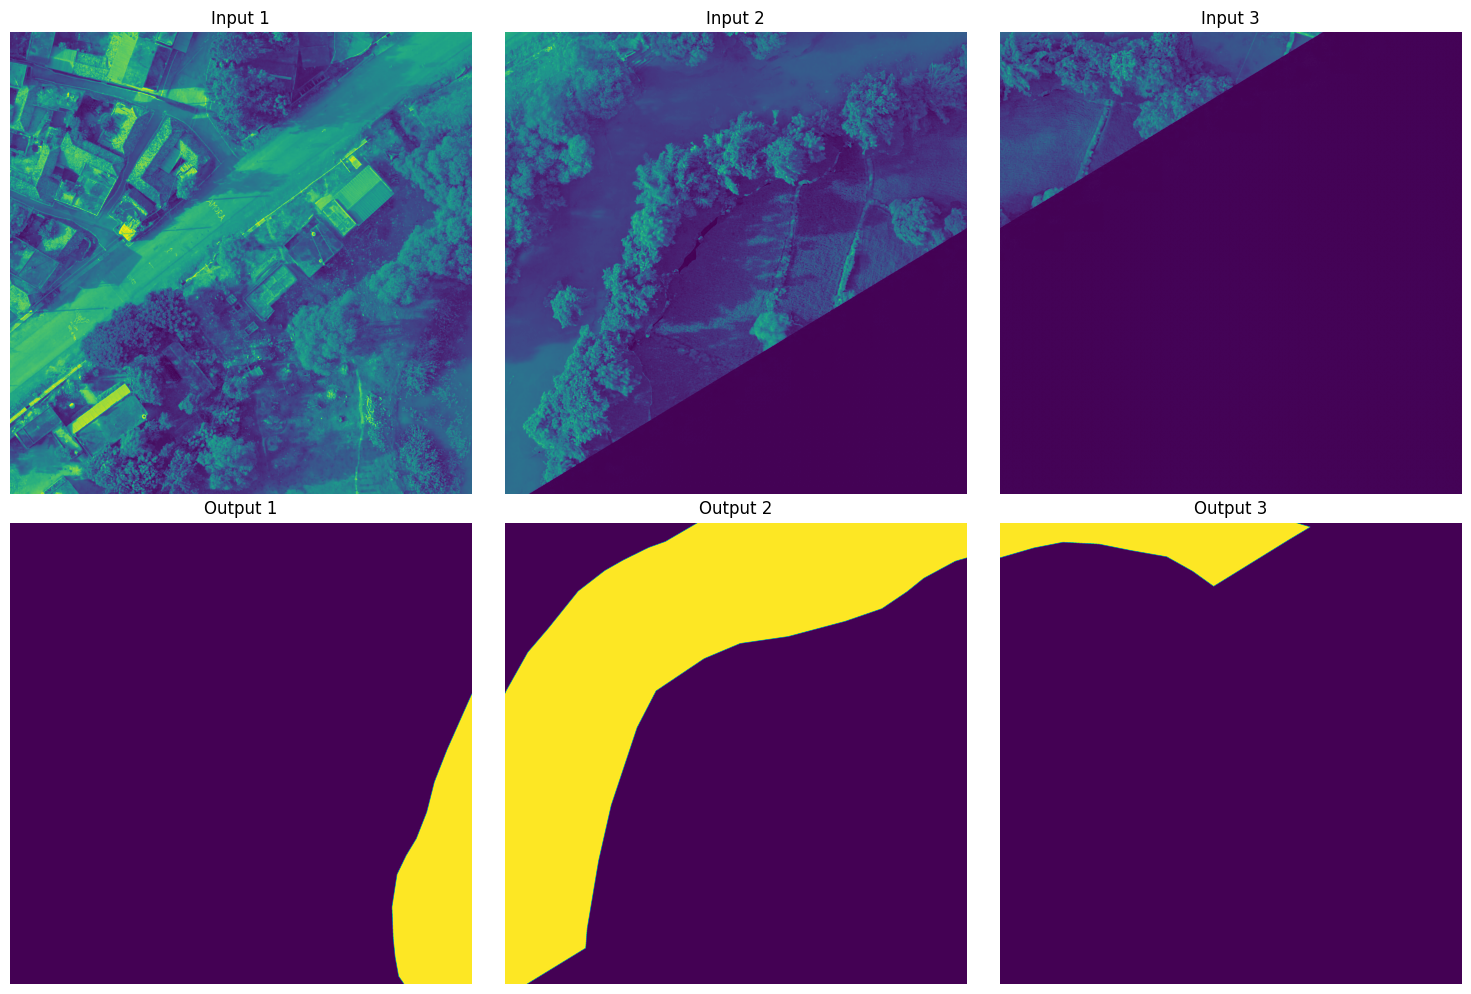

In [11]:
input_files = [
    "final_dataset/water_bodies/input/amirpur_output_tile_2_2.tif",
    "final_dataset/water_bodies/input/amirpur_output_tile_2_3.tif",
    "final_dataset/water_bodies/input/amirpur_output_tile_2_4.tif"
]

output_files = [
    "final_dataset/water_bodies/output/amirpur_output_tile_2_2.tif",
    "final_dataset/water_bodies/output/amirpur_output_tile_2_3.tif",
    "final_dataset/water_bodies/output/amirpur_output_tile_2_4.tif"
]

# Function to read and return the data from a TIFF file
def read_tiff(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1)  # Read the first band

# Create a figure with 2 rows and 3 columns (3 inputs and 3 outputs)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the input files (row 1)
for i, file in enumerate(input_files):
    data = read_tiff(file)
    ax = axes[0, i]  # Access the correct subplot
    ax.imshow(data, cmap='viridis')
    ax.set_title(f"Input {i+1}")
    ax.axis('off')

# Plot the output files (row 2)
for i, file in enumerate(output_files):
    data = read_tiff(file)
    ax = axes[1, i]  # Access the correct subplot
    ax.imshow(data, cmap='viridis')
    ax.set_title(f"Output {i+1}")
    ax.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

# Training UNet++ to Identify Buildings in Orthophoto Tiles

## Installing Additional Dependencies
The segmentation_models_pytorch package is a popular package that gives easy-to-use inferences for some of the most popular image segmentation models. Check out their GitHub repo [here](https://github.com/qubvel-org/segmentation_models.pytorch).

In [13]:
!pip install segmentation_models_pytorch 

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=7e59f858f4bfa678f489efd6ac2b96921f617294c196dfeecfca6f04a63ac47d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=d5e5c752ab3bcde688a115a635ead6ff9f21514ba91d40f6adb652af3c767972
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientne

## Training UNet++

In [14]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
import numpy as np

In [22]:
class CustomSegmentationDataset(Dataset):
    def __init__(self, input_images, mask_images, transform=None):
        """
        Custom dataset for image segmentation
        
        Args:
            input_images (list): List of input image paths
            mask_images (list): List of corresponding mask image paths
            transform (callable, optional): Optional image transformations
        """
        self.input_images = input_images
        self.mask_images = mask_images
        
        # Define standard transforms
        self.transform = transforms.Compose([
            transforms.Resize((512, 512), interpolation=transforms.InterpolationMode.NEAREST),
            transforms.ToTensor(),
        ])
        
        # Optional additional transforms
        self.additional_transform = transform
    
    def __len__(self):
        return len(self.input_images)
    
    def __getitem__(self, idx):
        # Read input image
        input_img = Image.open(self.input_images[idx]).convert('RGB')
        
        # Read mask image
        mask_img = Image.open(self.mask_images[idx]).convert('L')
        
        # Apply transforms
        input_tensor = self.transform(input_img)
        mask_tensor = transforms.Compose([
            transforms.Resize((512, 512), interpolation=transforms.InterpolationMode.NEAREST),
            transforms.ToTensor()
        ])(mask_img)
        
        # Binarize mask (ensure 0 and 1 values)
        mask_tensor = (mask_tensor > 0.5).float()
        
        return input_tensor, mask_tensor

In [23]:
def train_segmentation_model(input_dir, mask_dir, model_save_path='unetpp_model.pth'):
    """
    Train a UNet++ image segmentation model
    
    Args:
        input_dir (str): Directory containing input images
        mask_dir (str): Directory containing mask images
        model_save_path (str): Path to save trained model weights
    """
    # Get all image paths
    input_images = [os.path.join(input_dir, f) for f in os.listdir(input_dir) 
                    if f.lower().endswith(('.tif', '.tiff'))]
    mask_images = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir) 
                   if f.lower().endswith(('.png', '.jpg', '.tif', '.tiff'))]
    
    # Sort and match images
    input_images.sort()
    mask_images.sort()
    
    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(
        input_images, mask_images, test_size=0.2, random_state=42
    )
    
    # Create datasets
    train_dataset = CustomSegmentationDataset(X_train, y_train)
    val_dataset = CustomSegmentationDataset(X_val, y_val)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
    
    # Initialize UNet++ model
    model = smp.UnetPlusPlus(
        encoder_name='resnet34',  # Backbone encoder
        encoder_weights='imagenet',  # Pre-trained weights
        in_channels=3,  # RGB input
        classes=1,  # Binary segmentation
        activation='sigmoid'  # Sigmoid for binary output
    )
    
    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Loss and Optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    # Training loop
    num_epochs = 50
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for inputs, masks in train_loader:
            inputs, masks = inputs.to(device), masks.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute loss
            loss = criterion(outputs, masks)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, masks in val_loader:
                inputs, masks = inputs.to(device), masks.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, masks)
                val_loss += loss.item()
        
        # Print epoch statistics
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss/len(train_loader):.4f}, '
              f'Val Loss: {val_loss/len(val_loader):.4f}')
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)
    
    print(f'Best model saved to {model_save_path}')
    return model

We will train the model for 50 epochs.

In [25]:
def main():
    # Example usage
    input_dir = '/kaggle/working/final_dataset/built_up/input'  # Replace with your input directory
    mask_dir = '/kaggle/working/final_dataset/built_up/outputs'    # Replace with your mask directory
    
    # Train the model
    model = train_segmentation_model(input_dir, mask_dir, "buildings_unetpp_model.pth")

if __name__ == '__main__':
    main()

Epoch [1/50], Train Loss: 0.4098, Val Loss: 0.5020


KeyboardInterrupt: 

# Training UNet++ for Roads

We can re-use the same training code from before to train a UNet++ model for segmenting roads. We just need to change the input and output directories and set a new output path to save the model.

In [30]:
def main():
    # Example usage
    input_dir = '/kaggle/working/final_dataset/roads/input'  # Replace with your input directory
    mask_dir = '/kaggle/working/final_dataset/roads/output'    # Replace with your mask directory
    
    # Train the model
    model = train_segmentation_model(input_dir, mask_dir, "roads_unetpp_model.pth")

if __name__ == '__main__':
    main()

Epoch [1/50], Train Loss: 1.1348, Val Loss: 1.9700
Epoch [2/50], Train Loss: 0.8427, Val Loss: 0.9266
Epoch [3/50], Train Loss: 0.7051, Val Loss: 0.7087
Epoch [4/50], Train Loss: 0.6410, Val Loss: 0.9787
Epoch [5/50], Train Loss: 0.6305, Val Loss: 0.5930
Epoch [6/50], Train Loss: 0.5519, Val Loss: 0.5489
Epoch [7/50], Train Loss: 0.5119, Val Loss: 0.4868
Epoch [8/50], Train Loss: 0.4622, Val Loss: 0.4481
Epoch [9/50], Train Loss: 0.4531, Val Loss: 0.4364
Epoch [10/50], Train Loss: 0.3963, Val Loss: 0.3932
Epoch [11/50], Train Loss: 0.3767, Val Loss: 0.3747
Epoch [12/50], Train Loss: 0.3746, Val Loss: 0.3652
Epoch [13/50], Train Loss: 0.3456, Val Loss: 0.3535
Epoch [14/50], Train Loss: 0.3363, Val Loss: 0.3229
Epoch [15/50], Train Loss: 0.3116, Val Loss: 0.3226
Epoch [16/50], Train Loss: 0.2982, Val Loss: 0.3206
Epoch [17/50], Train Loss: 0.2928, Val Loss: 0.2901
Epoch [18/50], Train Loss: 0.2670, Val Loss: 0.2835
Epoch [19/50], Train Loss: 0.2483, Val Loss: 0.2555
Epoch [20/50], Train 

# Training UNet++ for Water Bodies

We can re-use the same training code from before to train a UNet++ model for segmenting water bodies. We just need to change the input and output directories and set a new output path to save the model. The training data for water bodies is much lesser than the data we have for roads and buildings.

In [34]:
def main():
    # Example usage
    input_dir = '/kaggle/working/final_dataset/water_bodies/input'  # Replace with your input directory
    mask_dir = '/kaggle/working/final_dataset/water_bodies/output'    # Replace with your mask directory
    
    # Train the model
    model = train_segmentation_model(input_dir, mask_dir, "water_bodies_unetpp_model.pth")

if __name__ == '__main__':
    main()

Epoch [1/50], Train Loss: 0.8245, Val Loss: 0.7315
Epoch [2/50], Train Loss: 0.7650, Val Loss: 0.7164
Epoch [3/50], Train Loss: 0.7048, Val Loss: 0.7678
Epoch [4/50], Train Loss: 0.6622, Val Loss: 0.8957
Epoch [5/50], Train Loss: 0.6530, Val Loss: 1.0593
Epoch [6/50], Train Loss: 0.6061, Val Loss: 1.1398
Epoch [7/50], Train Loss: 0.5856, Val Loss: 1.1256
Epoch [8/50], Train Loss: 0.5747, Val Loss: 1.0483
Epoch [9/50], Train Loss: 0.5498, Val Loss: 0.9300
Epoch [10/50], Train Loss: 0.5290, Val Loss: 0.8303
Epoch [11/50], Train Loss: 0.5112, Val Loss: 0.7625
Epoch [12/50], Train Loss: 0.5034, Val Loss: 0.7091
Epoch [13/50], Train Loss: 0.4789, Val Loss: 0.6547
Epoch [14/50], Train Loss: 0.4719, Val Loss: 0.6097
Epoch [15/50], Train Loss: 0.4570, Val Loss: 0.5666
Epoch [16/50], Train Loss: 0.4402, Val Loss: 0.5328
Epoch [17/50], Train Loss: 0.4354, Val Loss: 0.5057
Epoch [18/50], Train Loss: 0.4284, Val Loss: 0.4920
Epoch [19/50], Train Loss: 0.4090, Val Loss: 0.4792
Epoch [20/50], Train 

# Visualizing Segmentation Results
Lets visualize the predicted output of the model and compare it with the ground truth masks. We will also find the IoU score of the predicted masks. Running inference on images that are a part of the training data helps us understand how well the model understood the task.

In [31]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt

def load_model(model_path, encoder_name='resnet34', in_channels=3, classes=1):
    """
    Load a pre-trained UNet++ model
    
    Args:
        model_path (str): Path to the saved model weights
        encoder_name (str, optional): Name of the encoder backbone
        in_channels (int, optional): Number of input channels
        classes (int, optional): Number of output classes
    
    Returns:
        torch.nn.Module: Loaded model
    """
    # Initialize the model architecture
    model = smp.UnetPlusPlus(
        encoder_name=encoder_name,  # Backbone encoder
        encoder_weights=None,  # No pre-trained weights during inference
        in_channels=in_channels,  # RGB input
        classes=classes,  # Binary segmentation
        activation='sigmoid'  # Sigmoid for binary output
    )
    
    # Load the state dictionary
    model.load_state_dict(torch.load(model_path))
    
    # Set to evaluation mode
    model.eval()
    
    return model

def preprocess_image(image_path, target_size=(512, 512)):
    """
    Preprocess an input image for model inference
    
    Args:
        image_path (str): Path to the input image
        target_size (tuple, optional): Resize dimensions
    
    Returns:
        torch.Tensor: Preprocessed input tensor
    """
    # Open and convert image to RGB
    image = Image.open(image_path).convert('RGB')
    
    # Define transform
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
    ])
    
    # Apply transform and add batch dimension
    input_tensor = transform(image).unsqueeze(0)
    
    return input_tensor

def run_inference(model, input_tensor, threshold=0.5):
    """
    Run inference on an input tensor
    
    Args:
        model (torch.nn.Module): Loaded segmentation model
        input_tensor (torch.Tensor): Preprocessed input image tensor
        threshold (float, optional): Threshold for binary segmentation
    
    Returns:
        np.ndarray: Binary segmentation mask
    """
    # Ensure model is in evaluation mode
    model.eval()
    
    # Run inference
    with torch.no_grad():
        prediction = model(input_tensor)
    
    # Convert to numpy and create binary mask
    prediction_np = prediction.squeeze().cpu().numpy()
    binary_mask = (prediction_np > threshold).astype(np.uint8) * 255
    
    return binary_mask

def calculate_iou(pred_mask, gt_mask):
    """
    Calculate the Intersection over Union (IoU) score
    
    Args:
        pred_mask (np.ndarray): Predicted binary mask
        gt_mask (np.ndarray): Ground truth binary mask
    
    Returns:
        float: IoU score
    """
    # Flatten the masks to 1D arrays
    pred_mask_flat = pred_mask.flatten()
    gt_mask_flat = gt_mask.flatten()
    
    # True positive: both pred_mask and gt_mask have 1s
    intersection = np.sum((pred_mask_flat == 255) & (gt_mask_flat == 255))
    
    # Union: total number of 1s in both masks
    union = np.sum((pred_mask_flat == 255) | (gt_mask_flat == 255))
    
    # IoU calculation
    iou = intersection / union if union != 0 else 0.0
    return iou

def visualize_prediction(image_path, binary_mask, gt_mask=None, iou=None, save_path='inference_result.png'):
    """
    Visualize the segmentation prediction with optional IoU and ground truth comparison.
    Args:
        image_path (str): Path to the original input image.
        binary_mask (np.ndarray): Binary segmentation mask.
        gt_mask (np.ndarray, optional): Ground truth mask for comparison.
        iou (float, optional): IoU value for display.
        save_path (str, optional): Path to save the visualization.
    """
    # Load original image
    original_image = Image.open(image_path).convert('RGB')
    original_image = original_image.resize((512, 512))
    original_array = np.array(original_image)
    
    # Create figure with 3 subplots (for 3 images)
    plt.figure(figsize=(18, 6))
    
    # 1st Image: Base Image
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_array)
    plt.axis('off')

    # 2nd Image: Ground Truth Overlay
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth Overlay')
    plt.imshow(original_array)
    
    # Create overlay for ground truth (Green where true mask is)
    overlay_gt = original_array.copy().astype(float)
    overlay_gt[gt_mask > 0] = [0, 255, 0]  # Green where ground truth mask is true
    plt.imshow(overlay_gt / 255.0, alpha=0.5)
    plt.axis('off')

    # 3rd Image: Prediction Overlay
    plt.subplot(1, 3, 3)
    plt.title('Prediction Overlay')
    plt.imshow(original_array)
    
    # Create overlay for prediction (Red where predicted mask is)
    overlay_pred = original_array.copy().astype(float)
    overlay_pred[binary_mask > 0] = [255, 0, 0]  # Red where predicted mask is true
    plt.imshow(overlay_pred / 255.0, alpha=0.5)
    plt.axis('off')
    
    # If IoU is provided, display it at the bottom of the plot
    if iou is not None:
        plt.figtext(0.5, 0.01, f"IoU: {iou:.4f}", ha='center', fontsize=12, color='black')
    
    # Show the plot
    plt.show()

    # Optionally, save the result as an image file
    if save_path:
        plt.savefig(save_path)

## Buildings

/tmp/ipykernel_23/2775930947.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


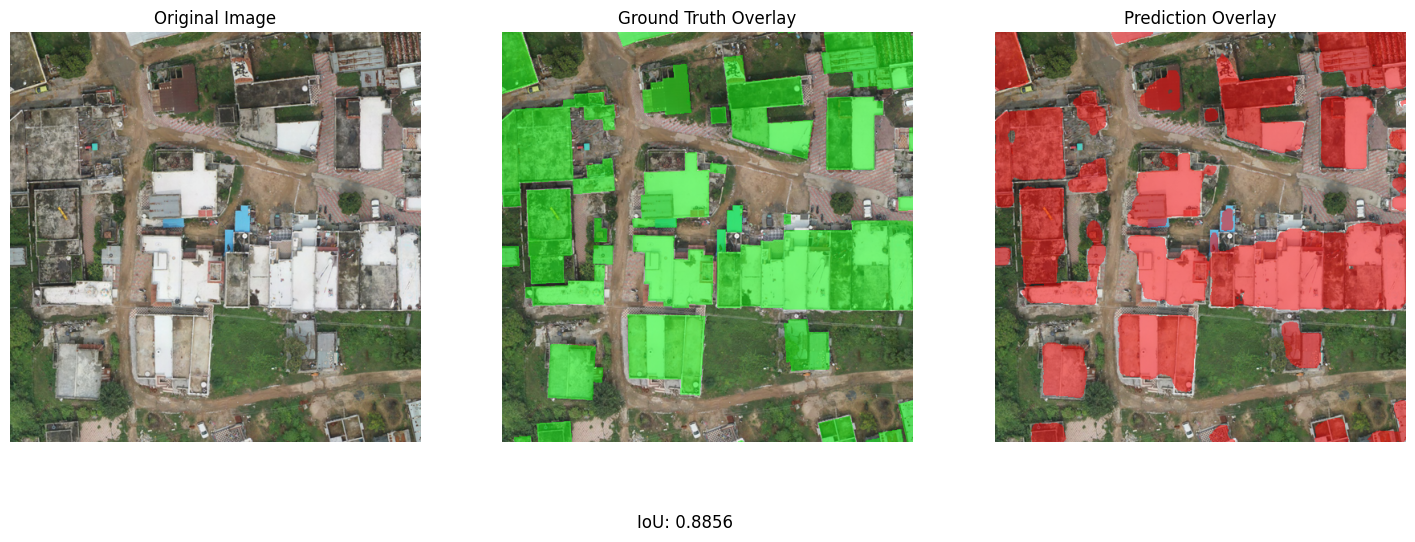

Inference complete. IoU: 0.8856
Results saved to 'inference_result.png'


<Figure size 640x480 with 0 Axes>

In [37]:
def main():
    # Paths (modify these as needed)
    model_path = 'unetpp_model.pth'  # Path to your trained model
    input_image_path = "/kaggle/working/final_dataset/built_up/input/output_tile_3_3.tif"  # Path to image for inference
    gt_mask_path = "/kaggle/working/final_dataset/built_up/outputs/output_tile_3_3.tif"  # Path to ground truth mask
    
    # Load the model
    model = load_model(model_path)
    
    # Preprocess the input image
    input_tensor = preprocess_image(input_image_path)
    
    # Run inference
    binary_mask = run_inference(model, input_tensor)
    
    # Load ground truth mask
    gt_mask = np.array(Image.open(gt_mask_path).convert('L').resize((512, 512)))
    
    # Calculate IoU
    iou = calculate_iou(binary_mask, gt_mask)
    
    # Visualize results
    visualize_prediction(input_image_path, binary_mask, gt_mask=gt_mask, iou=iou)
    
    print("Inference complete. IoU: {:.4f}".format(iou))
    print("Results saved to 'inference_result.png'")

if __name__ == '__main__':
    main()

We are achieving an IoU of 0.8993, which indicates a high degree of overlap between the predicted and ground truth masks, close to 90%.

## Roads

/tmp/ipykernel_23/2775930947.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


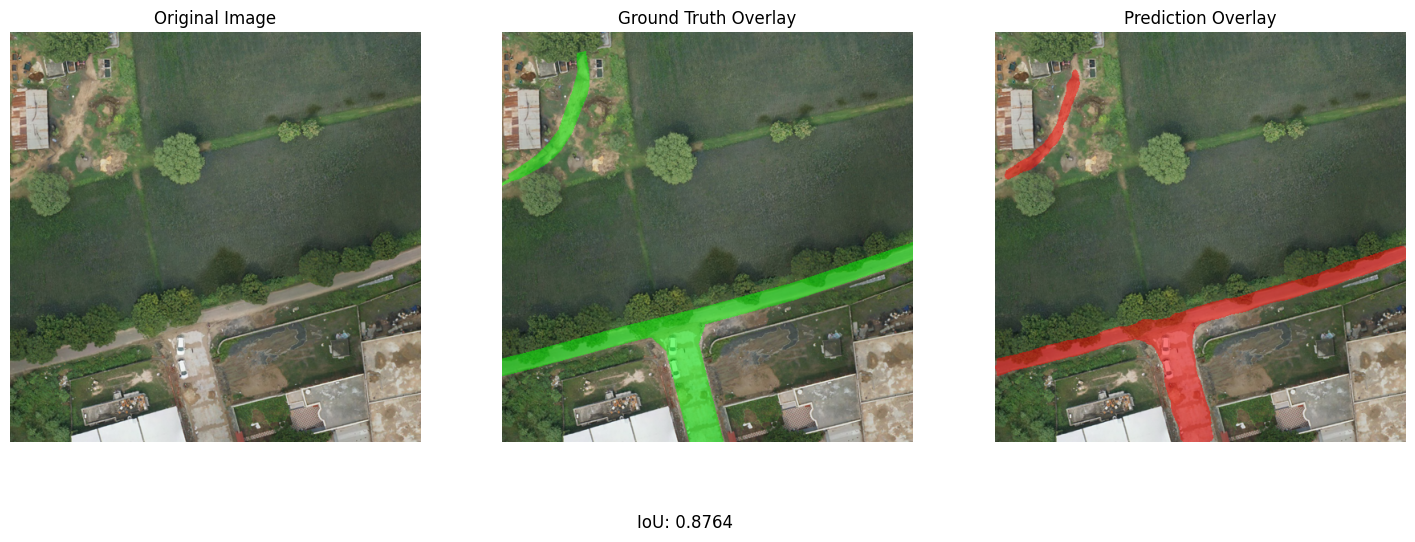

Inference complete. IoU: 0.8764
Results saved to 'inference_result.png'


<Figure size 640x480 with 0 Axes>

In [33]:
def main():
    # Paths (modify these as needed)
    model_path = 'roads_unetpp_model.pth'  # Path to your trained model
    input_image_path = "final_dataset/roads/input/output_tile_3_1.tif"  # Path to image for inference
    gt_mask_path = "final_dataset/roads/output/output_tile_3_1.tif"  # Path to ground truth mask
    
    # Load the model
    model = load_model(model_path)
    
    # Preprocess the input image
    input_tensor = preprocess_image(input_image_path)
    
    # Run inference
    binary_mask = run_inference(model, input_tensor)
    
    # Load ground truth mask
    gt_mask = np.array(Image.open(gt_mask_path).convert('L').resize((512, 512)))
    
    # Calculate IoU
    iou = calculate_iou(binary_mask, gt_mask)
    
    # Visualize results
    visualize_prediction(input_image_path, binary_mask, gt_mask=gt_mask, iou=iou)
    
    print("Inference complete. IoU: {:.4f}".format(iou))
    print("Results saved to 'inference_result.png'")

if __name__ == '__main__':
    main()

## Water Bodies

/tmp/ipykernel_23/2775930947.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


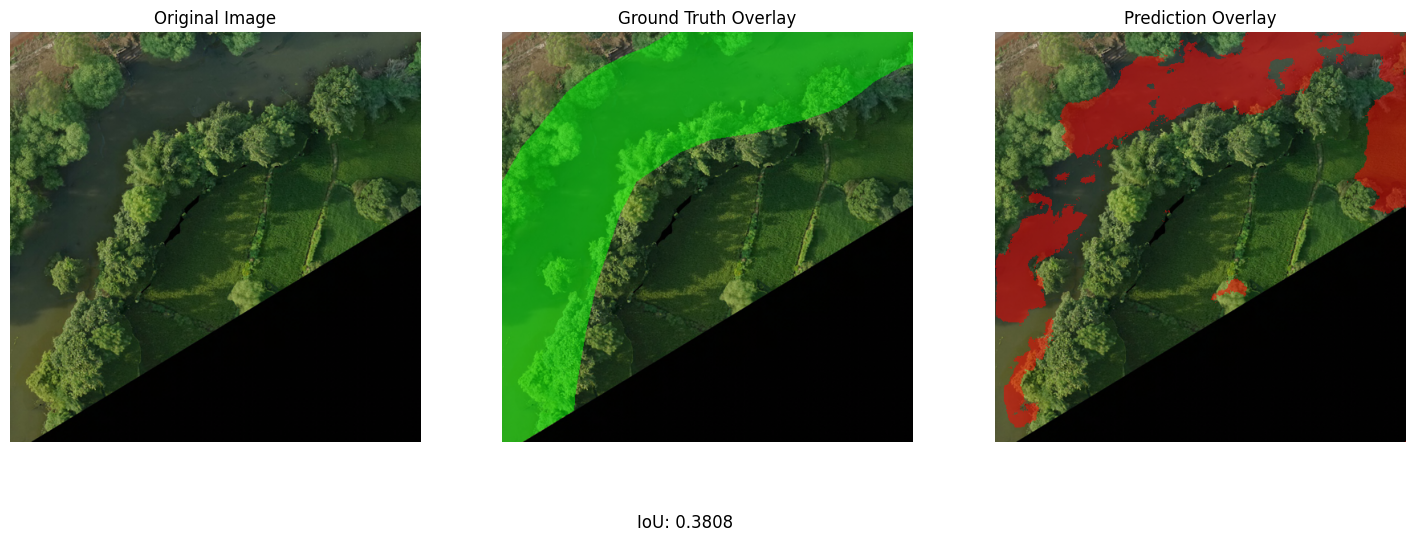

Inference complete. IoU: 0.3808
Results saved to 'inference_result.png'


<Figure size 640x480 with 0 Axes>

In [36]:
def main():
    # Paths (modify these as needed)
    model_path = 'water_bodies_unetpp_model.pth'  # Path to your trained model
    input_image_path = "final_dataset/water_bodies/input/amirpur_output_tile_2_3.tif"  # Path to image for inference
    gt_mask_path = "final_dataset/water_bodies/output/amirpur_output_tile_2_3.tif"  # Path to ground truth mask
    
    # Load the model
    model = load_model(model_path)
    
    # Preprocess the input image
    input_tensor = preprocess_image(input_image_path)
    
    # Run inference
    binary_mask = run_inference(model, input_tensor)
    
    # Load ground truth mask
    gt_mask = np.array(Image.open(gt_mask_path).convert('L').resize((512, 512)))
    
    # Calculate IoU
    iou = calculate_iou(binary_mask, gt_mask)
    
    # Visualize results
    visualize_prediction(input_image_path, binary_mask, gt_mask=gt_mask, iou=iou)
    
    print("Inference complete. IoU: {:.4f}".format(iou))
    print("Results saved to 'inference_result.png'")

if __name__ == '__main__':
    main()

Accuracy for the water body model is much lower due to a lack of training data. Also, the water bodies that were present in the training data were covered with algae - leading to the model confusing it for grass. The Detectron2 model we trained for water body segmentation seemed to perform much better for this task. Check it out [here](https://github.com/Kabeer2004/ProjectVaayu/tree/main#results-for-water-bodies).

# Training UNet++ to Perform Image Segmentation on RCC, Tiled and Tin Rooftops

An additional requirement of the problem statement was that the model should also be able to identify various roof-types - like RCC, Tin, Tiled and Other roofs. To train a model that can perform this task, we will take the original building segmentation model that we trained as a base and retrain that to segment out only specific rooftops.

In [38]:
!gdown 1wfQg7trniQMsI3ec6v_Cm0VT9YgtM78o

Downloading...
From (original): https://drive.google.com/uc?id=1wfQg7trniQMsI3ec6v_Cm0VT9YgtM78o
From (redirected): https://drive.google.com/uc?id=1wfQg7trniQMsI3ec6v_Cm0VT9YgtM78o&confirm=t&uuid=51d2bd7d-1c8f-4615-9d88-5851d7b9f186
To: /kaggle/working/roof_type.zip
100%|██████████████████████████████████████| 4.17G/4.17G [00:44<00:00, 94.0MB/s]


In [43]:
!unzip roof_type.zip

Archive:  roof_type.zip
   creating: others_builtup/input/
  inflating: others_builtup/input/amirpur_output_tile_0_2.tif  
  inflating: others_builtup/input/amirpur_output_tile_0_3.tif  
  inflating: others_builtup/input/amirpur_output_tile_0_4.tif  
  inflating: others_builtup/input/amirpur_output_tile_0_5.tif  
  inflating: others_builtup/input/amirpur_output_tile_0_7.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_1.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_2.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_3.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_4.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_5.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_6.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_7.tif  
  inflating: others_builtup/input/amirpur_output_tile_1_8.tif  
  inflating: others_builtup/input/amirpur_output_tile_2_1.tif  
  inflating: others_builtup/input/amirpur_out

In [44]:
def train_segmentation_model(
    input_dir, mask_dir, 
    model_save_path='unetpp_model.pth', 
    pretrained_weights_path=None
):
    """
    Fine-tune a UNet++ segmentation model with pre-trained weights.
    
    Args:
        input_dir (str): Directory containing input images.
        mask_dir (str): Directory containing mask images.
        model_save_path (str): Path to save trained model weights.
        pretrained_weights_path (str): Path to pre-trained model weights (.pth).
    """
    import os
    from sklearn.model_selection import train_test_split
    from torch.utils.data import DataLoader
    import segmentation_models_pytorch as smp
    import torch.nn as nn
    import torch
    
    # Get all image paths
    input_images = [os.path.join(input_dir, f) for f in os.listdir(input_dir) 
                    if f.lower().endswith(('.tif', '.tiff'))]
    mask_images = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir) 
                   if f.lower().endswith(('.png', '.jpg', '.tif', '.tiff'))]
    
    # Sort and match images
    input_images.sort()
    mask_images.sort()
    
    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(
        input_images, mask_images, test_size=0.2, random_state=42
    )
    
    # Create datasets
    train_dataset = CustomSegmentationDataset(X_train, y_train)
    val_dataset = CustomSegmentationDataset(X_val, y_val)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
    
    # Initialize UNet++ model
    model = smp.UnetPlusPlus(
        encoder_name='resnet34',  # Backbone encoder
        encoder_weights=None,  # Skip default ImageNet weights
        in_channels=3,  # RGB input
        classes=1,  # Binary segmentation (e.g., RCC rooftops)
        activation='sigmoid'  # Sigmoid for binary output
    )
    
    # Load pre-trained weights if provided
    if pretrained_weights_path:
        print(f"Loading pre-trained weights from {pretrained_weights_path}...")
        model.load_state_dict(torch.load(pretrained_weights_path, map_location=torch.device('cpu')))
    
    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Loss and Optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    # Training loop
    num_epochs = 50
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for inputs, masks in train_loader:
            inputs, masks = inputs.to(device), masks.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            
            # Compute loss
            loss = criterion(outputs, masks)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, masks in val_loader:
                inputs, masks = inputs.to(device), masks.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, masks)
                val_loss += loss.item()
        
        # Print epoch statistics
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss/len(train_loader):.4f}, '
              f'Val Loss: {val_loss/len(val_loader):.4f}')
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)
    
    print(f'Best model saved to {model_save_path}')
    return model


In [ ]:
# Train on RCC dataset with pre-trained weights
input_dir = '/kaggle/working/rcc_builtup/input'
mask_dir = '/kaggle/working/rcc_builtup/output'
pretrained_weights = 'unetpp_model.pth'

model = train_segmentation_model(
    input_dir, mask_dir, 
    model_save_path='rcc_unetpp_model.pth', 
    pretrained_weights_path=pretrained_weights
)

## Visualizing Results

/tmp/ipykernel_23/2775930947.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


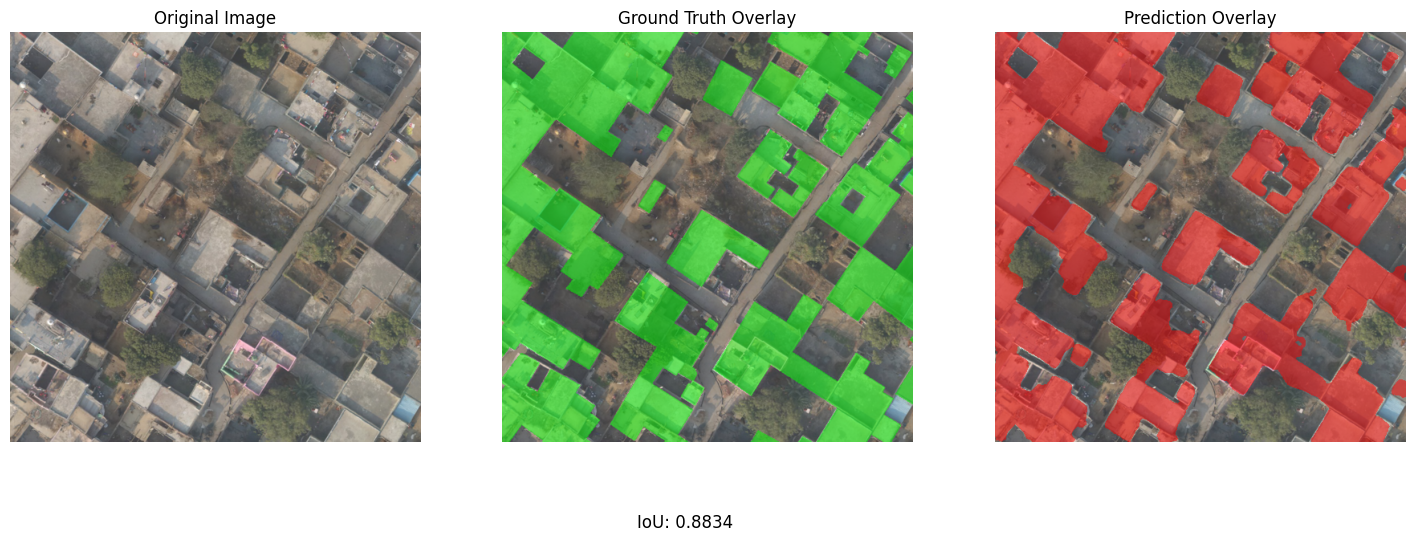

Inference complete. IoU: 0.8834
Results saved to 'inference_result.png'


<Figure size 640x480 with 0 Axes>

In [48]:
# Paths (modify these as needed)
model_path = 'rcc_unetpp_model.pth'  # Path to your trained model
input_image_path = "rcc_builtup/input/amirpur_output_tile_2_3.tif"  # Path to image for inference
gt_mask_path = "rcc_builtup/output/amirpur_output_tile_2_3.tif"  # Path to ground truth mask

# Load the model
model = load_model(model_path)

# Preprocess the input image
input_tensor = preprocess_image(input_image_path)

# Run inference
binary_mask = run_inference(model, input_tensor)

# Load ground truth mask
gt_mask = np.array(Image.open(gt_mask_path).convert('L').resize((512, 512)))

# Calculate IoU
iou = calculate_iou(binary_mask, gt_mask)

# Visualize results
visualize_prediction(input_image_path, binary_mask, gt_mask=gt_mask, iou=iou)

print("Inference complete. IoU: {:.4f}".format(iou))
print("Results saved to 'inference_result.png'")

As you can see, only the RCC rooftops are segmented out.